# Ford GoBike System - Effects of Ride Frequent & Ride Duration
## by Nivetha KS

## Investigation Overview

In this investigation, I wanted to look at the effects of Ride Frequent & Ride Duration influenced by ride time characteristics(Day, Month, Year) and Rider characteristics(Gender, User Type, Age). 

## Dataset Overview

The dataset use in this investigation consists of Ford GoBike sharing system covering the greater San Francisco Bay area in the year 2017(June-December).Refer [Bay_Wheels_wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels). It consists of various ride characteristics and riders characteristics.

Investigation focused on below features from the cleaned dataset:

- Trip Duration (seconds)
- Start Day
- Start Month
- Start Hour
- User Type (“Subscriber” = Member or “Customer” = Casual)
- Member Age
- Member Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/cleaned-fordgobike-tripdata-2017.csv')

## Relationship between Ride Frequency and Ride Duration

Intially distribution of ride duration has long tail and right skewed as dataset take on a very large range of values. So, I plotted the relationship on a logarithmic scale, the distribution of ride duration takes on a Unimodal shape and normally distributed.

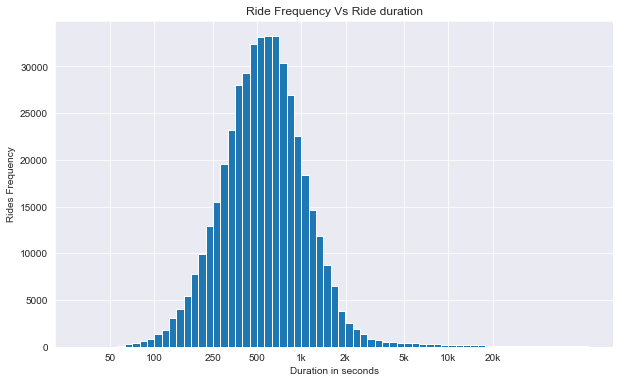

In [3]:
# set bins
bins = 10 ** np.arange(1.5, np.log10(df.duration_sec.max())+0.05, 0.05)

# plot the distribution
plt.figure(figsize=(10,6))
plt.hist(data = df, x = 'duration_sec', bins = bins)

# log scale transformation
plt.xscale('log')

# set title, lbels and ticks
plt.xticks([50,100,250,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,250,500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Ride Frequency Vs Ride duration')
plt.xlabel('Duration in seconds')
plt.ylabel('Rides Frequency');

In [4]:
# Remove the outliers where age greater than 60
df = df[df.member_age <= 60]

# set the default color
default_color = sb.color_palette()[0]

## Ride Frequency of User Type & Member Gender
- **Subcribers** have done more number of rides rather than **Customers**. As subscribed member ride price is less than casual customers, this might be the reason for more number of rides. Refer [Bay_Wheels_wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels).
- **Male** riders counts are three times more than the **Female** riders. **Other** gender type is verly less when compared to other genders

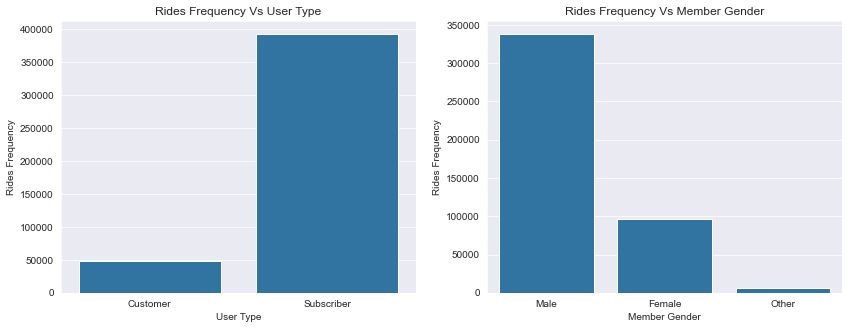

In [5]:
# set figure size
plt.figure(figsize=(14,5))

# plot relationship between Rides Frequency and Rider Member Gender
plt.subplot(1,2,1)
sb.countplot(data = df, x = 'user_type', color = default_color)

# title and labels
plt.xlabel('User Type')
plt.ylabel('Rides Frequency')
plt.title('Rides Frequency Vs User Type');

# plot relationship between Rides Frequency and Rider User Type
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'member_gender', color = default_color)

# title and labels
plt.xlabel('Member Gender')
plt.ylabel('Rides Frequency')
plt.title('Rides Frequency Vs Member Gender');

## Ride Duration for User Type & Member Gender
- Comparing to ride frequency, ride duration is higher for **Females** and **Other** genders rather than **Males** and **Customers** rather than **Subscribers**

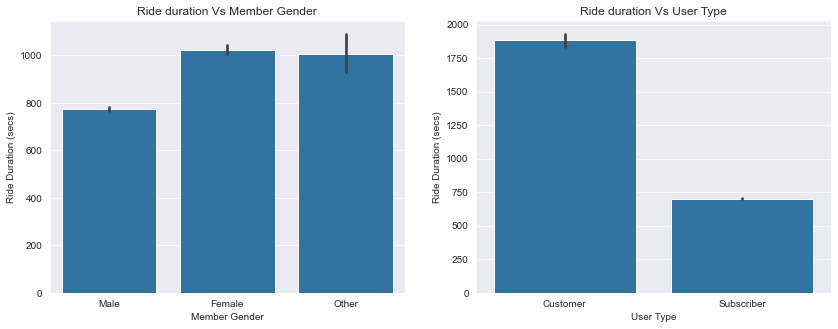

In [6]:
# set figure size
plt.figure(figsize=(14,5))

# plot relationship between Ride duration and Rider Member Gender
plt.subplot(1,2,1)
sb.barplot(data = df, y = 'duration_sec', x = 'member_gender', color = default_color)

# title and labels
plt.xlabel('Member Gender')
plt.ylabel('Ride Duration (secs)')
plt.title('Ride duration Vs Member Gender')

# plot relationship between Ride duration and Rider User Type
plt.subplot(1,2,2)
sb.barplot(data = df, y = 'duration_sec', x = 'user_type', color = default_color)

# title and labels
plt.xlabel('User Type')
plt.ylabel('Ride Duration (secs)')
plt.title('Ride duration Vs User Type');

## Relationship between Ride Frequency, Ride duration and Member Age
- Most of riders age lies between **29 - 42** age range which indicates riders age infulences the ride frequency.
- Surprisingly all age group riders are uniformly distributed ride durations which means older riders are riding fast as well as the younger riders ranges approximately below 20k seconds

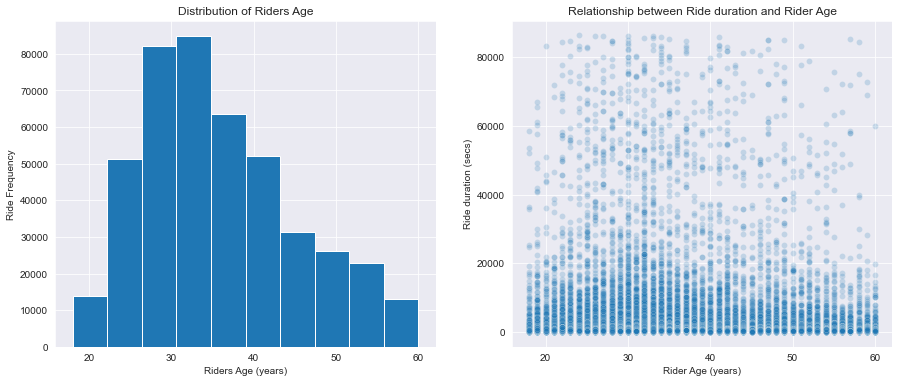

In [7]:
# set figure size
plt.figure(figsize=(15,6))

# plot the distribution
plt.subplot(1,2,1)
plt.hist(data = df, x = 'member_age')

# set title
plt.title('Distribution of Riders Age')
plt.xlabel('Riders Age (years)')
plt.ylabel('Ride Frequency')

# plot relationship between Ride duration and Rider Age
plt.subplot(1,2,2)
sb.scatterplot(data = df, x='member_age', y = 'duration_sec', alpha=0.2);

# set title and labels
plt.title('Relationship between Ride duration and Rider Age')
plt.ylabel('Ride duration (secs)')
plt.xlabel('Rider Age (years)');

## Ride Frequency Vs Time Characteristics(Day, Month, Hour)

- **Weekdays** has higher ride counts rather than **weekend**. Especially ride count for mid three days of the week (Tue, Wed, Thurs) ranges between 75k and 80k. It makes sense that because of the working schedule.
- More number of rides commuted in **October** month. **July** ride counts are very low, it might because of the launch of the program. 
- Peak hours are **8-9 AM** and **4-6 PM**. This is the common commuting time. 

In [8]:
# time characteristic order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hour_order = np.arange(0,24)

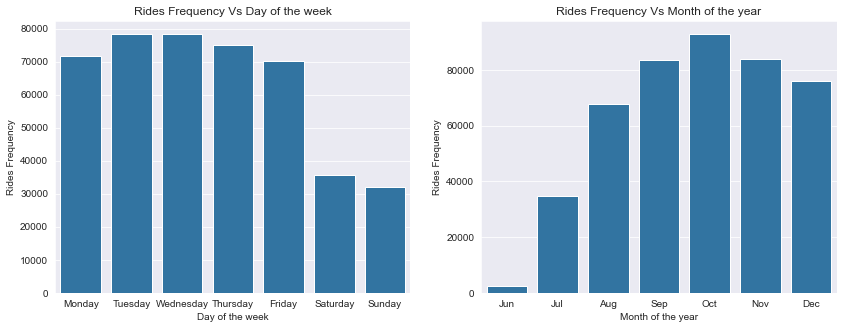

In [9]:
# set figure size
plt.figure(figsize=(14,5))

# plot relationship between Ride duration and Rider Member Gender
plt.subplot(1,2,1)
sb.countplot(data = df, x = 'start_day', color = default_color, order = day_order)

# title and labels
plt.xlabel('Day of the week')
plt.ylabel('Rides Frequency')
plt.title('Rides Frequency Vs Day of the week')

# plot relationship between Ride duration and Rider User Type
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'start_month', color = default_color, order = month_order)

# title and labels
plt.xlabel('Month of the year')
plt.ylabel('Rides Frequency')
plt.title('Rides Frequency Vs Month of the year');

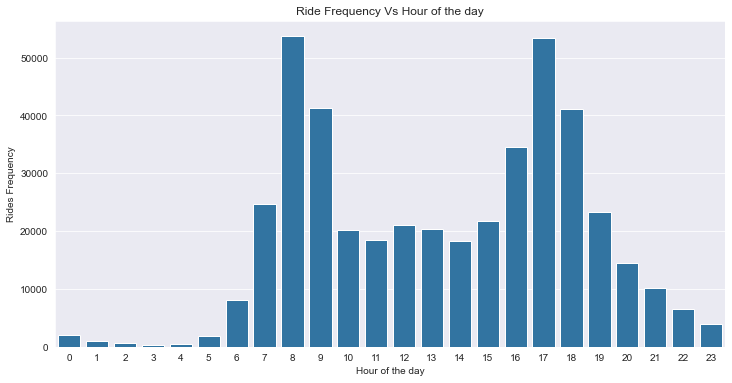

In [10]:
# set figure size
plt.figure(figsize=(12,6))

# plot the Hour
sb.countplot(data = df, x = 'start_hour', color = default_color, order = hour_order);

# set title and labels
plt.title('Ride Frequency Vs Hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Rides Frequency');

## Ride Duration Vs Time Characteristics(Day, Month, Hour)
- Relationship between time characteristics and ride duartion is totally differs from Relationship between time characteristics and peak frequency rides.
- Weekends rides are taking more ride duration over weekends. July month and 3 AM has higher ride durations.  

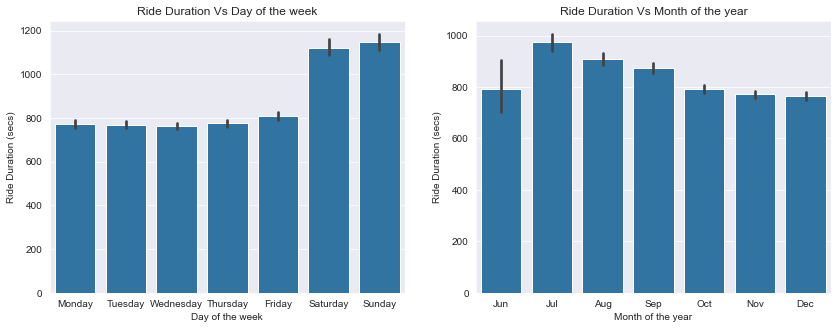

In [11]:
# set figure size
plt.figure(figsize=(14,5))

# plot relationship between Ride duration and Weekday
plt.subplot(1,2,1)
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', order = day_order, color = default_color)

# title and labels
plt.xlabel('Day of the week')
plt.ylabel('Ride Duration (secs)')
plt.title('Ride Duration Vs Day of the week')

# plot relationship between Ride duration and Month
plt.subplot(1,2,2)
sb.barplot(data = df, x = 'start_month', y = 'duration_sec', order = month_order, color = default_color)

# title and labels
plt.xlabel('Month of the year')
plt.ylabel('Ride Duration (secs)')
plt.title('Ride Duration Vs Month of the year');

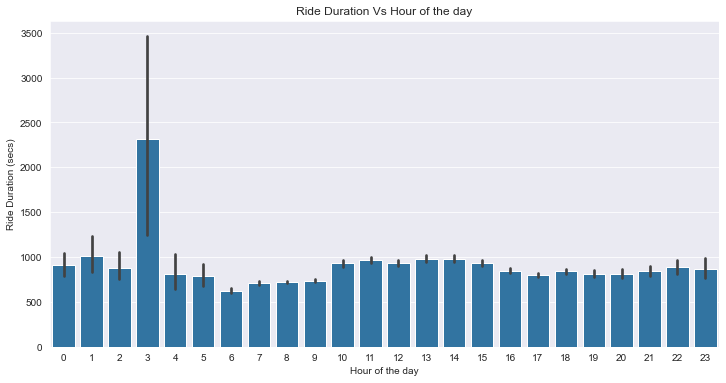

In [12]:
# set figure size
plt.figure(figsize=(12,6))

# plot relationship between Ride duration Hour
sb.barplot(data = df, x = 'start_hour', y = 'duration_sec', order = hour_order, color = default_color);

# set title and labels
plt.title('Ride Duration Vs Hour of the day');
plt.xlabel('Hour of the day')
plt.ylabel('Ride Duration (secs)');

## Relationship between time characteristics and Riders characteristics(Gender, User Type) by ride Frequency

- **Ride Frequency Peak times**(day: weekdays, month: Oct-Dec, hour: 8-9AM, 4-6PM)
- **Subscribed Male** riders are commuting more during **weekdays**(Tuesday & Wednesday: ~56k, Thursday: ~53k) whereas Other gender casual customers are commuting the least eternally.
- **Subscribed Male** riders are commuting more during **October** month(~65k).
- **Subscribed Male** riders are commuting more during the peak hours **8-9 AM** upto(~ 37k) and **4-6 PM** upto(~ 38k).

In [13]:
# groupby Day, Gender and User Type by size 
day_gen_typ = df.groupby(['start_day', 'member_gender', 'user_type']).size().reset_index(name='count')
#pivot to rearrange the grouped data
day_gen_typ = day_gen_typ.pivot(index = 'start_day', columns = ['member_gender', 'user_type'], values = 'count')

# groupby Month, Gender and User Type by size 
mon_gen_typ = df.groupby(['start_month', 'member_gender', 'user_type']).size().reset_index(name='count')
#pivot to rearrange the grouped data
mon_gen_typ = mon_gen_typ.pivot(index = 'start_month', columns = ['member_gender', 'user_type'], values = 'count')

# groupby Hour, Gender and User Type by size 
hr_gen_typ = df.groupby(['start_hour', 'member_gender', 'user_type']).size().reset_index(name='count')
#pivot to rearrange the grouped data
hr_gen_typ = hr_gen_typ.pivot(index = 'start_hour', columns = ['member_gender', 'user_type'], values = 'count')

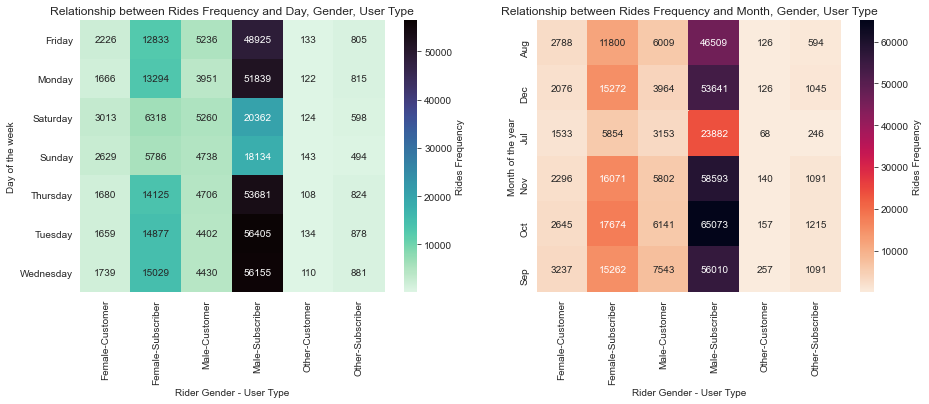

In [14]:
# set figure size
plt.figure(figsize=(15,5))

# plot heatmap Day, Gender and User Type
plt.subplot(1,2,1)
sb.heatmap(day_gen_typ.dropna(), annot = True, fmt = 'd', cmap = 'mako_r', cbar_kws={'label': 'Rides Frequency'})

# set title and label
plt.title('Relationship between Rides Frequency and Day, Gender, User Type')
plt.xlabel('Rider Gender - User Type')
plt.ylabel('Day of the week')

# plot heatmap Month, Gender and User Type
plt.subplot(1,2,2)
sb.heatmap(mon_gen_typ.dropna(), annot = True, fmt = '.0f', cmap = 'rocket_r', cbar_kws={'label': 'Rides Frequency'})

# set title and label
plt.title('Relationship between Rides Frequency and Month, Gender, User Type')
plt.xlabel('Rider Gender - User Type')
plt.ylabel('Month of the year');

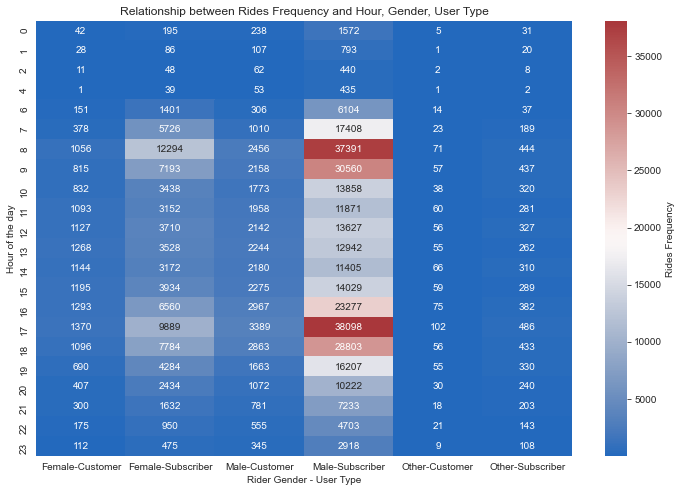

In [15]:
# set figure size
plt.figure(figsize=(12,8))

# plot heatmap Month, Gender and User Type
sb.heatmap(hr_gen_typ.dropna(), annot = True, fmt = '.0f', cmap = 'vlag', cbar_kws={'label': 'Rides Frequency'})

# set title and label
plt.title('Relationship between Rides Frequency and Hour, Gender, User Type')
plt.xlabel('Rider Gender - User Type')
plt.ylabel('Hour of the day');

## Relationship between time characteristics and Riders characteristics(Gender, User Type) by Ride Duration

- **Ride Duration Peak times**(day: weekends - month: Jul-Aug, hour: 3AM)
- Overall subscribed Female riders and casual Other gender riders are taking more ride duration who rides the most during ride duration with respect to ride duration. Males are taking higer ride duration at specific timeframe Jun month and 3AM.

In [16]:
# groupby Day, Gender and User Type by avg duration 
day_ride = df.groupby(['start_day', 'member_gender', 'user_type']).mean().duration_sec.reset_index()

# groupby Month, Gender and User Type by avg duration 
month_ride = df.groupby(['start_month', 'member_gender', 'user_type']).mean().duration_sec.reset_index()

# groupby Hour, Gender and User Type by avg duration 
hour_ride = df.groupby(['start_hour', 'member_gender', 'user_type']).mean().duration_sec.reset_index()

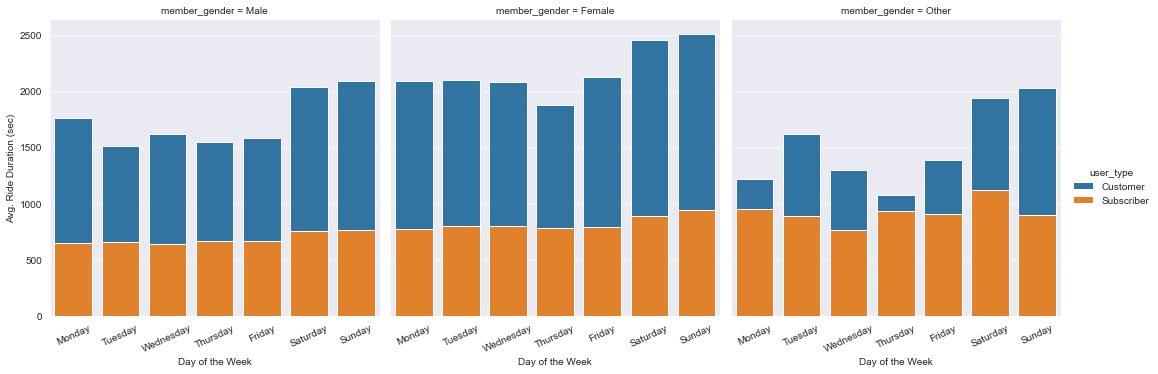

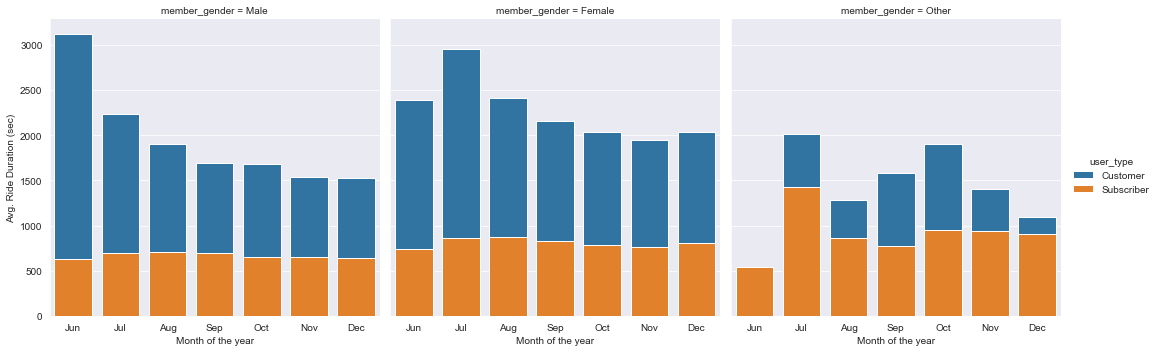

In [17]:
# plot the day_ride relationship using facegrid 
g = sb.FacetGrid(data=day_ride, col='member_gender', hue='user_type', col_order = ['Male','Female','Other'], height=5)
g.map(sb.barplot, 'start_day', 'duration_sec', order=day_order);

# set plot properties
g.set_xticklabels(day_order, rotation=25)
g.set_axis_labels("Day of the Week", "Avg. Ride Duration (sec)")
g.add_legend()

# plot the day_ride relationship using facegrid 
h = sb.FacetGrid(data=month_ride, col='member_gender', hue='user_type', col_order = ['Male','Female','Other'], height=5)
h.map(sb.barplot, 'start_month', 'duration_sec', order=month_order);

# set plot properties
h.set_xticklabels(month_order, rotation=0)
h.set_axis_labels("Month of the year", "Avg. Ride Duration (sec)")
h.add_legend();

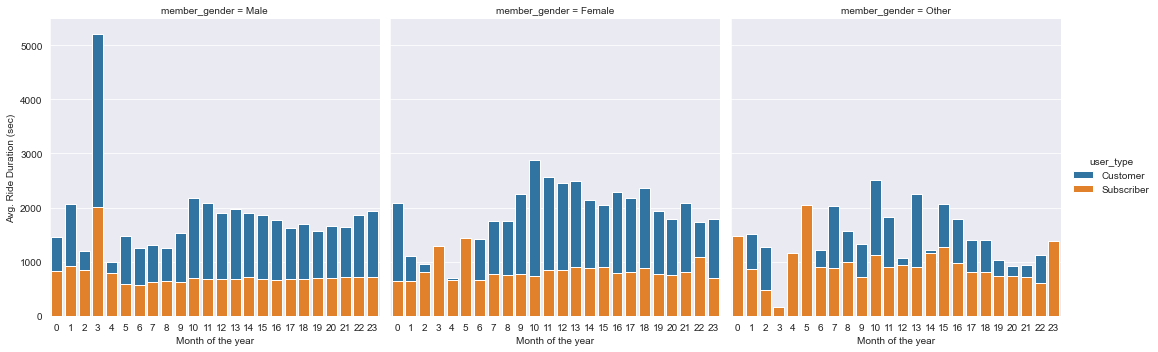

In [18]:
# plot the day_ride relationship using facegrid 
i = sb.FacetGrid(data=hour_ride, col='member_gender', hue='user_type', col_order = ['Male','Female','Other'], height=5)
i.map(sb.barplot, 'start_hour', 'duration_sec', order=hour_order)

# set plot properties
i.set_xticklabels(hour_order, rotation=0);
i.set_axis_labels("Month of the year", "Avg. Ride Duration (sec)")
i.add_legend();

## Summary

According to my investigation, Ride Frequency is highly dependent on ride time characteristics and rider characteristics whereas Ride Duration isn't completetly associated with other data characteristics.